In [10]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import random

class ImageMagic:
    def __init__(self, file_name: str) -> None:
        self.image = Image.open(file_name)
        self.draw = ImageDraw.Draw(self.image)
        self.width = self.image.size[0]
        self.height = self.image.size[1]
        self.pix = self.image.load()


    def RGB(self) -> str:
        return f'RGB = ({self.pix[1, 1][0]}, {self.pix[1, 1][1]}, {self.pix[1, 1][2]})'
    
    def show_image(self, text: str) -> None:
        print(text)
        plt.imshow(self.image)
        plt.show()

    def show_image_with_line(self, text: str, start: tuple, end: tuple) -> None:
        print(text)
        plt.imshow(self.image)
        plt.plot([start[0], end[0]], [start[1], end[1]], color='black', label='Line')
        plt.scatter(*start, color='red', label='Start', s=100, zorder=3)
        plt.scatter(*end, color='green', label='End', s=100, zorder=3)
        plt.legend()
        plt.show()

    def save_to_file(self, filename: str) -> None:
        self.image.save(filename, "JPEG")

    def brightness(self) -> None:
        change = int(input('Brightness change parameter x, x є [-255; 255]: '))
        for i in range(self.width):
            for j in range(self.height):
                r = self.pix[i, j][0] + change
                g = self.pix[i, j][1] + change
                b = self.pix[i, j][2] + change
                self.draw.point((i, j), (r, g, b))

        self.show_image(f"Image with changed brightness: \n{self.RGB()}")

    def brightness_gradient(self) -> None:
        start = (0, 0)
        end = (self.width-1, self.height-1)

        max_brightness = int(input('Change brightness to x, x є [-255; 255]: '))
        gradient = max_brightness / (self.width + self.height)

        x1, y1 = start
        x2, y2 = end
        dx, dy = abs(x2 - x1), abs(y2 - y1)
        dir_x = 1 if x1 < x2 else -1
        dir_y = 1 if y1 < y2 else -1
        dxy = dx - dy
        x, y = x1, y1

        while x != x2 or y != y2:
            change = int(gradient * (x - x1 + y - y1))
            for j in range(self.height):
                if 0 <= x < self.width and 0 <= j < self.height:
                    r = self.pix[x, j][0] + change
                    g = self.pix[x, j][1] + change
                    b = self.pix[x, j][2] + change
                    self.draw.point((x, j), (r, g, b))

            dxy2 = 2 * dxy
            if dxy2 > -dy:
                dxy -= dy
                x += dir_x
            if dxy2 < dx:
                dxy += dx
                y += dir_y

        self.show_image_with_line(f"Image with brightness gradient change", start, end)

    def negative(self) -> None:
        for i in range(self.width):
            for j in range(self.height):
                r = 255 - self.pix[i, j][0]
                g = 255 - self.pix[i, j][1]
                b = 255 - self.pix[i, j][2]
                self.draw.point((i, j), (r, g, b))

        self.show_image(f"Negative image: \n{self.RGB()}")

    def negative_gradient(self) -> None:
        start = (0, 0)
        end = (self.width-1, self.height-1)

        negative_start = 0
        negative_end = 255

        x1, y1 = start
        x2, y2 = end
        dx, dy = abs(x2 - x1), abs(y2 - y1)
        dir_x = 1 if x1 < x2 else -1
        dir_y = 1 if y1 < y2 else -1
        dxy = dx - dy
        x, y = x1, y1

        while x != x2 or y != y2:
            change = negative_start + (negative_end - negative_start) * (x - x1 + y - y1) / (self.width + self.height)
            for j in range(self.height):
                if 0 <= x < self.width and 0 <= j < self.height:
                    r = int(255 - self.pix[x, j][0] * (change/255))
                    g = int(255 - self.pix[x, j][1] * (change/255))
                    b = int(255 - self.pix[x, j][2] * (change/255))
                    self.draw.point((x, j), (r, g, b))

            dxy2 = 2 * dxy
            if dxy2 > -dy:
                dxy -= dy
                x += dir_x
            if dxy2 < dx:
                dxy += dx
                y += dir_y

        self.show_image_with_line(f"Negative gradient image", start, end)

    def grey(self) -> None:
        for i in range(self.width):
            for j in range(self.height):
                r = self.pix[i, j][0]
                g = self.pix[i, j][1]
                b = self.pix[i, j][2]
                average = int((r+g+b) / 3)
                self.draw.point((i, j), (average, average, average))

        self.show_image(f"Greyscale image: \n{self.RGB()}")

    def grey_gradient(self) -> None:
        start = (0, 0)
        end = (self.width-1, self.height-1)

        x1, y1 = start
        x2, y2 = end
        dx, dy = abs(x2 - x1), abs(y2 - y1)
        dir_x = 1 if x1 < x2 else -1
        dir_y = 1 if y1 < y2 else -1
        dxy = dx - dy
        x, y = x1, y1

        while x != x2 or y != y2:
            change = 255 * (x - x1 + y - y1) / (self.width + self.height)
            for j in range(self.height):
                if 0 <= x < self.width and 0 <= j < self.height:
                    r = self.pix[x, j][0]
                    g = self.pix[x, j][1]
                    b = self.pix[x, j][2]
                    average = (r+g+b) / 3
                    average = int(average + change)
                    self.draw.point((x, j), (average, average, average))

            dxy2 = 2 * dxy
            if dxy2 > -dy:
                dxy -= dy
                x += dir_x
            if dxy2 < dx:
                dxy += dx
                y += dir_y

        self.show_image_with_line(f"Greyscale gradient image", start, end)

    def sepia(self) -> None:
        change = int(input('Sepia parameter x, x є [-255; 255]: '))
        for i in range(self.width):
            for j in range(self.height):
                r = self.pix[i, j][0]
                g = self.pix[i, j][1]
                b = self.pix[i, j][2]
                average = int((r+g+b) / 3)
                r = average + change*2
                g = average + change
                b = average
                self.draw.point((i, j), (r, g, b))

        self.show_image(f"Sepia image: \n{self.RGB()}")

    def sepia_gradient(self):
        start = (0, 0)
        end = (self.width-1, self.height-1)

        max_sepia = int(input('Sepia depth parameter x, x є [-255; 255]: '))
        sepia = max_sepia / (self.width + self.height)

        x1, y1 = start
        x2, y2 = end
        dx, dy = abs(x2 - x1), abs(y2 - y1)
        dir_x = 1 if x1 < x2 else -1
        dir_y = 1 if y1 < y2 else -1
        dxy = dx - dy
        x, y = x1, y1

        while x != x2 or y != y2:
            change = int(sepia * (x - x1 + y - y1))
            for j in range(self.height):
                if 0 <= x < self.width and 0 <= j < self.height:
                    r = self.pix[x, j][0]
                    g = self.pix[x, j][1]
                    b = self.pix[x, j][2]
                    average = int((r+g+b) / 3)
                    r = average + change*2
                    g = average + change
                    b = average
                    self.draw.point((x, j), (r, g, b))

            dxy2 = 2 * dxy
            if dxy2 > -dy:
                dxy -= dy
                x += dir_x
            if dxy2 < dx:
                dxy += dx
                y += dir_y

        self.show_image_with_line(f"Sepia gradient image: ", start, end)
  




Initial image: RGB = (58, 54, 51)


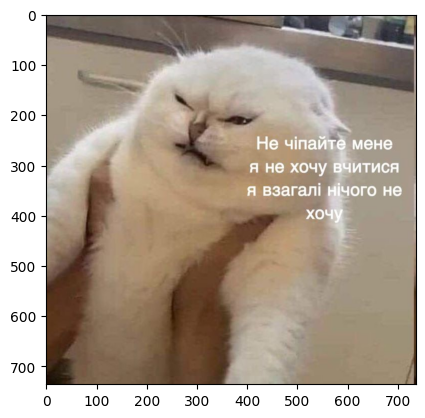

Image with changed brightness: 
RGB = (228, 224, 221)


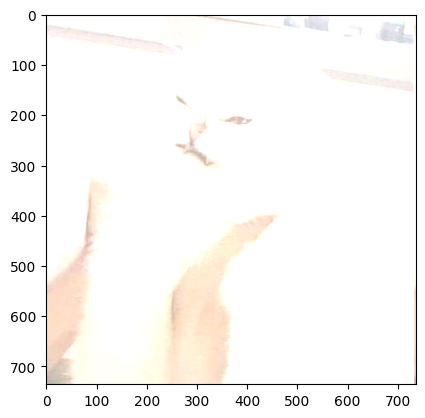

In [11]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.brightness()

Initial image: RGB = (161, 129, 91)


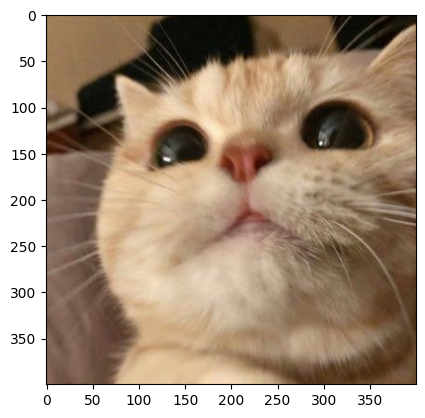

Image with brightness gradient change


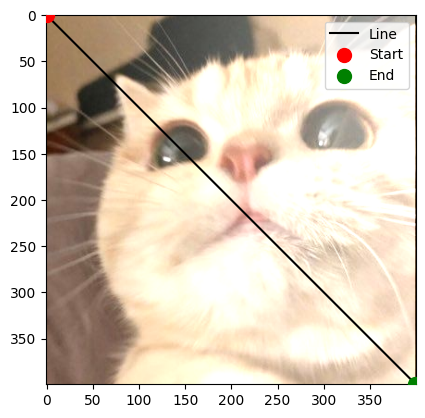

In [12]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.brightness_gradient()

Initial image: RGB = (161, 129, 91)


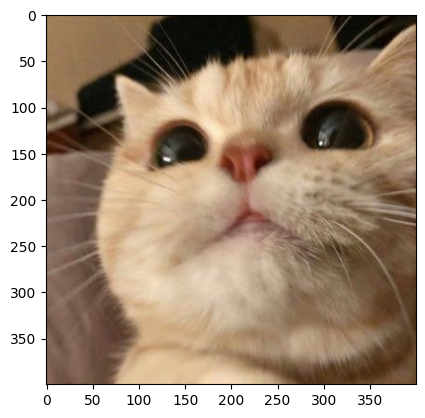

Negative image: 
RGB = (94, 126, 164)


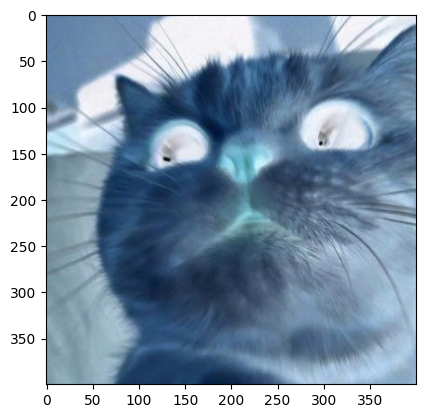

In [13]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.negative()

Initial image: RGB = (45, 43, 56)


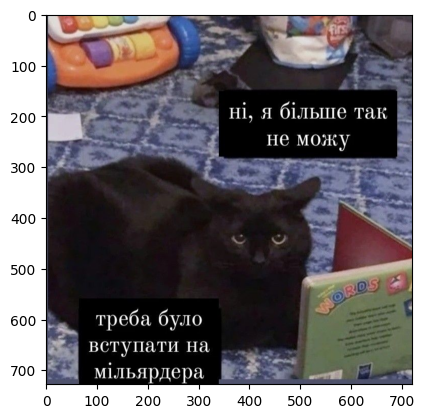

Negative gradient image


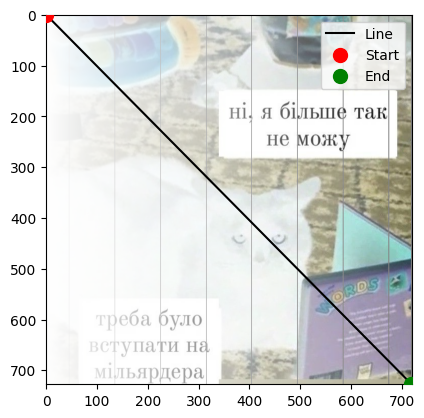

In [14]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.negative_gradient()

Initial image: RGB = (161, 129, 91)


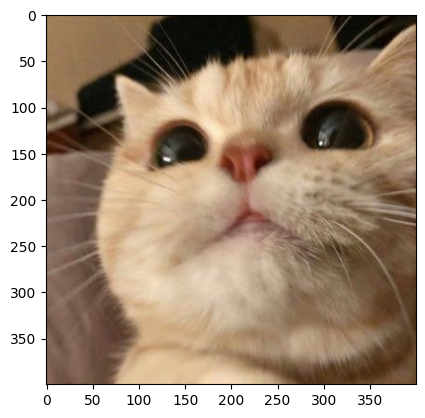

Greyscale image: 
RGB = (127, 127, 127)


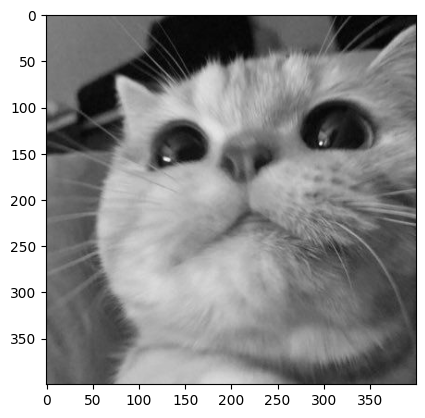

In [15]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.grey()

Initial image: RGB = (45, 43, 56)


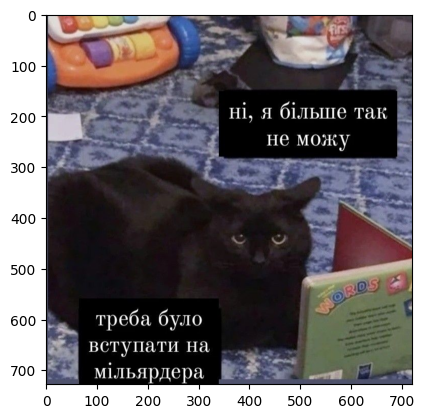

Greyscale gradient image


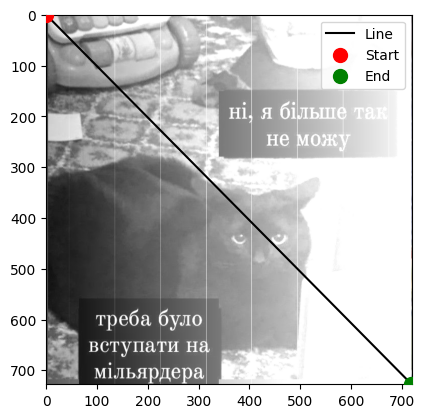

In [16]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.grey_gradient()

Initial image: RGB = (161, 129, 91)


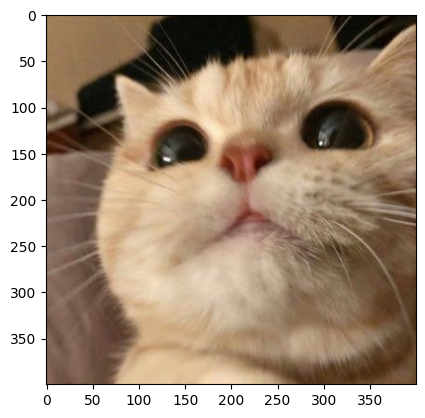

Sepia image: 
RGB = (255, 255, 127)


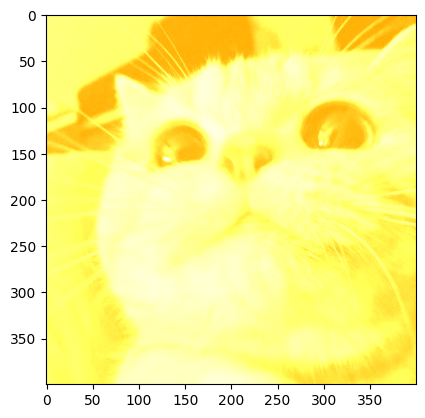

In [17]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.sepia()

Initial image: RGB = (45, 43, 56)


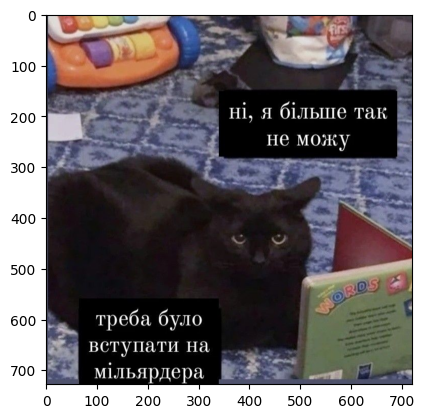

Sepia gradient image: 


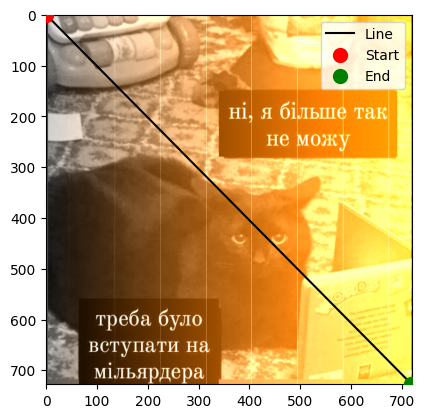

In [18]:
im = ImageMagic(f"cats/cat{random.randint(1, 3)}.jpg")
im.show_image(f"Initial image: {im.RGB()}")
im.sepia_gradient()